PART A — Load Pretrained Models

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load VGG16 with ImageNet weights (include classification head)
vgg_model = VGG16(weights='imagenet', include_top=True)

# Print summary
vgg_model.summary()


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Load ResNet50 with ImageNet weights
resnet_model = ResNet50(weights='imagenet', include_top=True)

# Print summary
resnet_model.summary()


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

Record:

Input shape → (224,224,3)

Output classes → 1000

Parameters → (VGG ~138M, ResNet ~25M approx)

PART B — Preprocessing

In [4]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Select one sample image
sample_image = x_train[0]

# Resize image to 224x224 (required for VGG/ResNet)
sample_resized = tf.image.resize(sample_image, (224,224))

# Convert to numpy array
sample_resized = np.array(sample_resized)

# Expand dimension (model expects batch dimension)
sample_batch = np.expand_dims(sample_resized, axis=0)

# Print raw pixel range
print("Raw Min:", sample_batch.min())
print("Raw Max:", sample_batch.max())


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Raw Min: 1.1368684e-13
Raw Max: 254.99998


In [5]:
# Apply VGG preprocessing
vgg_processed = vgg_preprocess(sample_batch.copy())

print("VGG Min:", vgg_processed.min())
print("VGG Max:", vgg_processed.max())


VGG Min: -123.67999
VGG Max: 136.22098


In [6]:
# Apply VGG preprocessing
vgg_processed = vgg_preprocess(sample_batch.copy())

print("VGG Min:", vgg_processed.min())
print("VGG Max:", vgg_processed.max())


VGG Min: -123.67999
VGG Max: 136.22098


In [7]:
# Apply ResNet preprocessing
resnet_processed = resnet_preprocess(sample_batch.copy())

print("ResNet Min:", resnet_processed.min())
print("ResNet Max:", resnet_processed.max())


ResNet Min: -123.67999
ResNet Max: 136.22098


Important:

VGG subtracts mean RGB values

ResNet scales differently

Raw range: 0–255

After preprocessing: negative + positive values

**PART C — Top-5 Predictions**

In [8]:
# VGG prediction
vgg_preds = vgg_model.predict(vgg_processed)

# Decode top-5 predictions
print("VGG Top-5:")
print(decode_predictions(vgg_preds, top=5)[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
VGG Top-5:
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
[('n01744401', 'rock_python', np.float32(0.056780443)), ('n07584110', 'consomme', np.float32(0.05269282)), ('n02112706', 'Brabancon_griffon', np.float32(0.036181275)), ('n01773549', 'barn_spider', np.float32(0.032849558)), ('n07590611', 'hot_pot', np.float32(0.030517837))]


In [9]:
# ResNet prediction
resnet_preds = resnet_model.predict(resnet_processed)

print("ResNet Top-5:")
print(decode_predictions(resnet_preds, top=5)[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
ResNet Top-5:
[('n02487347', 'macaque', np.float32(0.42248794)), ('n02486261', 'patas', np.float32(0.28262272)), ('n02089867', 'Walker_hound', np.float32(0.05132404)), ('n02089973', 'English_foxhound', np.float32(0.046457697)), ('n01688243', 'frilled_lizard', np.float32(0.035577677))]


Why CIFAR not match ImageNet?

CIFAR images low resolution (32x32 originally)

ImageNet trained on high resolution images

Classes slightly different

PART D — Feature Extraction

In [10]:
# Load models without top layer (remove classification head)
vgg_feature_model = VGG16(weights='imagenet', include_top=False)
resnet_feature_model = ResNet50(weights='imagenet', include_top=False)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [11]:
# Pass image through feature extractor
vgg_feature_map = vgg_feature_model.predict(vgg_processed)
resnet_feature_map = resnet_feature_model.predict(resnet_processed)

# Print feature map shapes
print("VGG Feature Shape:", vgg_feature_map.shape)
print("ResNet Feature Shape:", resnet_feature_map.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
VGG Feature Shape: (1, 7, 7, 512)
ResNet Feature Shape: (1, 7, 7, 2048)


In [12]:
# Apply Global Average Pooling to convert feature maps to vector
gap = GlobalAveragePooling2D()

vgg_vector = gap(vgg_feature_map)
resnet_vector = gap(resnet_feature_map)

print("VGG Feature Vector Size:", vgg_vector.shape)
print("ResNet Feature Vector Size:", resnet_vector.shape)


VGG Feature Vector Size: (1, 512)
ResNet Feature Vector Size: (1, 2048)


**PART E — Feature Map Visualization**

In [13]:
# Create intermediate model for early VGG layer
layer_model = Model(inputs=vgg_feature_model.input,
                    outputs=vgg_feature_model.get_layer("block1_conv2").output)

# Get feature maps
feature_maps = layer_model.predict(vgg_processed)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


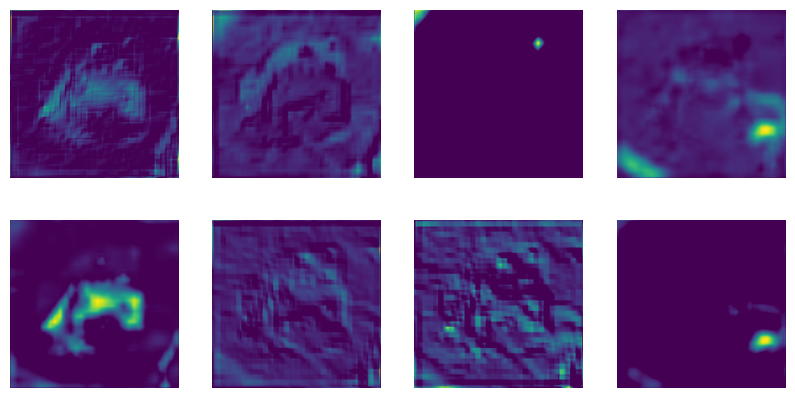

In [14]:
# Visualize first 8 feature maps
plt.figure(figsize=(10,5))

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(feature_maps[0,:,:,i], cmap='viridis')
    plt.axis("off")

plt.show()


In [15]:
deep_model = Model(inputs=vgg_feature_model.input,
                   outputs=vgg_feature_model.get_layer("block4_conv3").output)

deep_maps = deep_model.predict(vgg_processed)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


**PART F — Transfer Learning (ResNet50)**

In [18]:
# Normalize CIFAR images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Select a smaller subset for demonstration to avoid OOM errors
x_train_subset = x_train[:1000]
x_test_subset = x_test[:100]

# Resize training images to 224x224
x_train_resized = tf.image.resize(x_train_subset, (224,224))
x_test_resized = tf.image.resize(x_test_subset, (224,224))

In [19]:
# Load base ResNet without top
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False


In [20]:
# Add custom classification head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


In [21]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [22]:
# Train for 5 epochs
history = model.fit(x_train_resized, y_train,
                    epochs=5,
                    validation_split=0.2)


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 504ms/step - accuracy: 0.0967 - loss: 2.3891 - val_accuracy: 0.0850 - val_loss: 2.3209
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.1017 - loss: 2.3435 - val_accuracy: 0.1000 - val_loss: 2.3407
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.0931 - loss: 2.3304 - val_accuracy: 0.0850 - val_loss: 2.3645
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.1014 - loss: 2.3449 - val_accuracy: 0.0700 - val_loss: 2.3416
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.1053 - loss: 2.3422 - val_accuracy: 0.0700 - val_loss: 2.3474


**Fine-Tuning**

In [23]:
# Unfreeze last 30 layers
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Compile with small learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train 2 more epochs
model.fit(x_train_resized, y_train,
          epochs=2,
          validation_split=0.2)


Epoch 1/2
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 415ms/step - accuracy: 0.0952 - loss: 2.3365 - val_accuracy: 0.0700 - val_loss: 2.3489
Epoch 2/2
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.0895 - loss: 2.3116 - val_accuracy: 0.0700 - val_loss: 2.3560
